In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

# The Human Eye

# Gray Scale Images

In [195]:
FILEPATH = "../misc/7.2.01.tiff"
img = mpimg.imread(FILEPATH)

## Q1

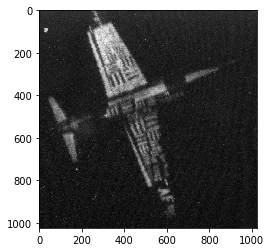

In [196]:
plt.imshow(img, cmap='gray',interpolation='none')

## Q2

In [197]:
minimum_pixel = np.min(img)
maximum_pixel = np.max(img)
print("Maximum pixel value is {} and Minimum value is {} .".format(maximum_pixel, minimum_pixel))

Nbits = int(np.ceil(np.log2(maximum_pixel)))
print("{} bits are used per pixel.".format(Nbits))

Npixels = img.shape[0]*img.shape[1]
print("Resolution of the image is {}x{}, In total of {} pixels are used.".format(img.shape[0], img.shape[1], Npixels))

Maximum pixel value is 192 and Minimum value is 4 .
8 bits are used per pixel.
Resolution of the image is 1024x1024, In total of 1048576 pixels are used.


## Q3

In [198]:
import os

csize = os.path.getsize(FILEPATH)
print("Size of compressed is {} bytes.".format(csize))
print("The compressed image is {}% more than calculated size.".format(((8*csize/(Npixels*Nbits))-1)*100))

Size of compressed is 1048710 bytes.
The compressed image is 0.01277923583984375% more than calculated size.


## Q4

In [199]:
def get_b_coeff(n, b):
    n >>= b
    return n%2

def display_b_plane(I, b):
    bin_img = I.copy()
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            bin_img[i, j] = get_b_coeff(I[i, j], b)
    plt.imshow(bin_img, cmap='gray')
    plt.title("{} Plane".format(b))
    return 
    

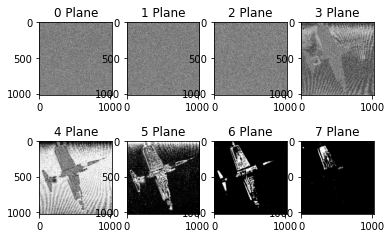

In [200]:
for i in range(Nbits):
    plt.subplot(2, 4, 1+i)
    display_b_plane(img, i)

# Binary Image Processing

## Q1

In [201]:
def histogram(I, Nbits):
    counter = np.zeros(2**Nbits)
    
    for i in I.ravel():
        counter[i] += 1
    return np.array([np.arange(2**Nbits), counter]) 

<BarContainer object of 256 artists>

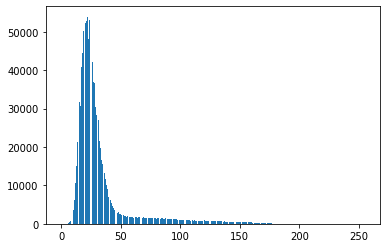

In [202]:
hist = histogram(img, Nbits)
plt.bar(hist[0], hist[1])

## Q2

In [203]:
def thresh(I, T):
    return (I>T).astype(int)

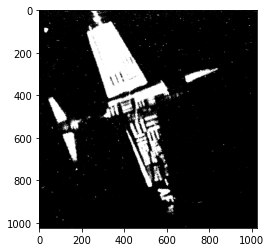

In [205]:
bin_img = thresh(img, 50)
plt.imshow(bin_img, cmap='gray')

## Q3 (a)

In [211]:
def otsu_algo_a(I, Nbits):
    bin_I = I.copy()
    hist = histogram(I, Nbits)
    pmf = hist[1]/np.sum(hist[1])
    
    intra_class_var = []
    
    plt.bar(hist[0], pmf)
    for t in range(2**Nbits):
        p0 = np.sum(pmf[0:t])
        p1 = 1-p0
        if(t==0):
            var0 = 0
        else:
            var0 = np.var(pmf[0:t])
        var1 = np.var(pmf[t:])
        intra_class_var.append(p0*var0 + p1*var1)
    t0 = np.argmin(intra_class_var)
    return (intra_class_var[t0], t0)

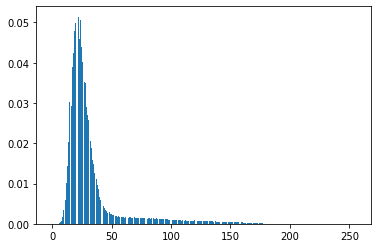

In [212]:
var, t = otsu_algo_a(img, Nbits)

Optimal threshould is 16 for which intra-class variance is 0.00010383313168983401.


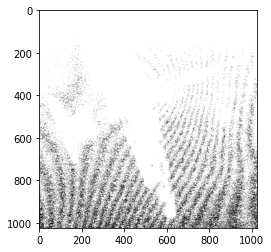

In [208]:
print("Optimal threshould is {} for which intra-class variance is {}.".format(t, var))
bin_img = thresh(img, t)
plt.imshow(bin_img, cmap='gray')

## Q3 (b)

## Q4

In [142]:
def complement(bin_I):
    c_bin_I = bin_I.copy()
    for i in range(c_bin_I.shape[0]):
        for j in range(c_bin_I.shape[1]):
            c_bin_I[i, j] = 1 - c_bin_I[i, j]
    return c_bin_I

def connected_component(bin_I):
    R = np.zeros(bin_I.shape)
    k = 1
    for i in range(bin_I.shape[0]):
        for j in range(bin_I.shape[1]):
            if(i == 0 and j == 0):
                if(bin_I[0, 0] == 0):
                    R[i, j] = k
                    k += 1
            elif(i == 0):
                if(bin_I[i, j-1] == 0 and bin_I[i, j] == 0):
                    R[i, j] = R[i, j-1]
                elif(bin_I[i, j] == 0):
                    R[i, j] = k
                    k += 1
            elif(j == 0):
                if(bin_I[i-1, j] == 0 and bin_I[i, j] == 0):
                    R[i, j] = R[i-1, j]
                elif(bin_I[i, j] == 0):
                    R[i, j] = k
                    k += 1
            else:
                if(bin_I[i, j] == 0):
                    if(bin_I[i-1, j] == 0 and bin_I[i, j-1] == 0):
                        if(R[i-1, j] != R[i, j-1]):
                            R[i, j] = min(R[i-1, j], R[i, j-1])
                        else:
                            R[i, j] = min(R[i-1, j], R[i, j-1])
                    elif(bin_I[i-1, j] == 0):
                        R[i, j] = R[i-1, j]
                    elif(bin_I[i, j-1] == 0):
                        R[i, j] = R[i, j-1]
                    else:
                        R[i, j] = k
                        k += 1
    return R

In [143]:
c_bin_img = complement(bin_img)
R = connected_component(bin_img)
print(R)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 6. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


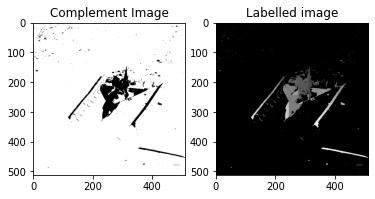

In [144]:
plt.subplot(1, 2, 1)
plt.title("Complement Image")
plt.imshow(bin_img, cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Labelled image")
plt.imshow(255*R/np.max(R), cmap="gray")

## Q5

In [145]:
(label, area) = np.unique(R, return_counts=True)

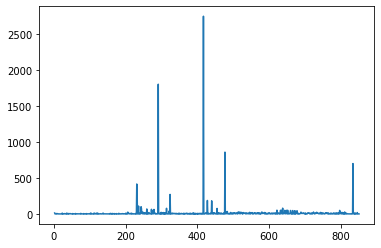

In [148]:
plt.plot(label[2:], area[2:])

In [149]:
def minor_blob_removal(I, R, m):
    new_I = I.copy()
    for i in range(new_I.shape[0]):
        for j in range(new_I.shape[1]):
            if(new_I[i, j]==0 and R[i, j]==m):
                new_I[i, j] = 1
    return new_I

In [153]:
mbr_img = minor_blob_removal(bin_img, R, 1)
for i in range(2, 200):
    mbr_img = minor_blob_removal(mbr_img, R, i)

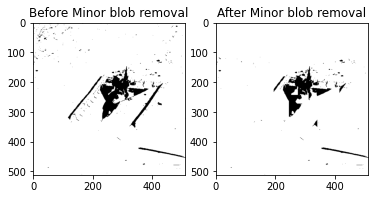

In [156]:
plt.subplot(1, 2, 1)
plt.title("Before Minor blob removal")
plt.imshow(bin_img, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("After Minor blob removal")
plt.imshow(mbr_img, cmap="gray")